In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

# set the parameter
n = 12
mu = 0.03
sigma = 0.3
alpha_max = n * sigma**2 / 8
theta_1 = 0.3
delta_1_values = np.array([1, 4])


theta_j_values = np.linspace(0, 1, n - 1)
delta_j_values = np.linspace(0.5, 2.7, n - 1)

theta_j_values = np.append(theta_j_values,theta_1)

color = ['blue','orange']


def pi_star(i, n, mu, sigma, delta_i, alpha, theta_i, theta_j, delta_j):
    theta_hat = sum(theta_j / (n + theta_j) )
    s = sum(n * alpha * delta_j /( (n + theta_j) * (n * sigma**2 - delta_j * alpha) ))

    if 1 - theta_hat!= n * alpha * delta_i / ((n + theta_i) * (n * sigma**2 - delta_i * alpha)):
        result = (n / (n + theta_i)) * (n * delta_i * mu / (n * sigma**2 - delta_i * alpha))
        
        numerator = sum((n / (n + theta_j)) * (n * delta_j / (n * sigma**2 - delta_j * alpha)) * mu )
        denominator = 1 - theta_hat - s

        result += ((theta_i / (n + theta_i)) + (n * alpha * delta_i / ((n + theta_i) * (n * sigma**2 - delta_i * alpha))))*(numerator / denominator)
        return result
    else:
        return None  # there is no constant Nash equilibrium

# calculate α0
def find_alpha_0(delta_j,theta_j):
    theta_hat = sum(theta_j / (n + theta_j) )
    for alpha in [i * 0.0001 for i in range(int(alpha_max / 0.0001))]:
        if abs(sum(n * alpha * delta_j / ((n + theta_j) * (n * sigma**2 - delta_j * alpha)) ) + theta_hat - 1) < 0.01:
            return alpha
    return None




: 

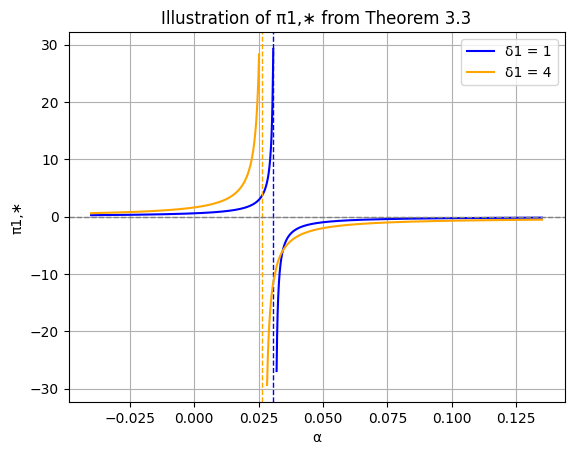

In [64]:
# plot the figure
alpha_values = [i * 0.0001 for i in range(int(-0.04 / 0.0001), int(alpha_max / 0.0001) + 1)]
for i in range(len(delta_1_values)):
    delta_1  = delta_1_values[i]
    pi_1_values = []
    pi_2_values = []
    alpha_remove = []
    alpha1 = []
    alpha2 = []
    alpha0 = 0
    j=0
    delta_j_values1 = np.concatenate((delta_j_values,np.array([delta_1_values[i]])))
    alpha_0 = find_alpha_0(delta_j_values1,theta_j_values)
    plt.axvline(alpha_0, color=color[i], linestyle='--', linewidth=1)
    for alpha in alpha_values:
        pi = pi_star(1,n,mu,sigma,delta_1, alpha,theta_1,theta_j_values,delta_j_values1 )
        if pi<30 and pi>0 and alpha < alpha_0:
            pi_1_values.append(pi)
            alpha1.append(alpha)
        elif pi>-30 and pi<0 and alpha > alpha_0:
            pi_2_values.append(pi)
            alpha2.append(alpha)

        else:
            alpha_remove.append(alpha)
    for alpha_re in alpha_remove:
        alpha_values.remove(alpha_re)
    plt.plot(alpha1, pi_1_values, color=color[i],label=f'δ1 = {delta_1}')
    plt.plot(alpha2, pi_2_values, color=color[i])
  
# Adding auxiliary lines
plt.axhline(0, color='gray', linestyle='--', linewidth=1)


plt.xlabel('α')
plt.ylabel('π1,∗')
plt.title('Illustration of π1,∗ from Theorem 3.3')
plt.legend()
plt.grid(True)
plt.show()

- $\alpha$ is negative: the investors engage less in the financial market because it is an anomaly;

- $\alpha$ is close to $\alpha_0$:the agents trade very aggressively and try to outperform the others:

in case of a smaller price impact ($α < α_0$) the agents buy the stock and jointly increase the stock value and thus raise their utility because it is less risky;

in case of a larger price impact ($α > α_0$) they jointly short-sell the stock and thus decrease its value because it is more risky;

- $\alpha$ is large enough:the agents agree on investing less, because then it seems to be difficult to beat the performance of the others.

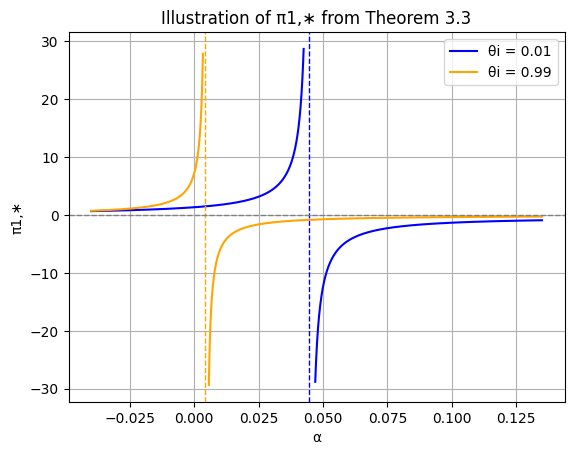

In [65]:
# figures with different θ1

# update the parameter
theta_1_values = np.array([0.01, 0.99])
delta_j_values = np.linspace(0.5, 2.7, n - 1)
delta_1 = 4
delta_j_values = np.append(delta_j_values,delta_1)
theta_j_values = np.linspace(0, 0, n - 1, endpoint=True)

# plot the figure
alpha_values = [i * 0.0001 for i in range(int(-0.04 / 0.0001), int(alpha_max / 0.0001) + 1)]
for i in range(len(theta_1_values)):
    theta_1  = theta_1_values[i]
    pi_1_values = []
    pi_2_values = []
    alpha_remove = []
    alpha1 = []
    alpha2 = []
    alpha0 = 0
    j=0
    theta_j_values1 = np.concatenate((np.linspace(theta_1_values[i], theta_1_values[i], n - 1, endpoint=True),np.array([theta_1_values[i]])))
    theta_j_values1 = np.linspace(theta_1_values[i], theta_1_values[i], n)
    alpha_0 = find_alpha_0(delta_j_values,theta_j_values1)
    plt.axvline(alpha_0, color=color[i], linestyle='--', linewidth=1)
    for alpha in alpha_values:
        pi = pi_star(1,n,mu,sigma,delta_1, alpha,theta_1,theta_j_values1,delta_j_values )
        if pi<30 and pi>0 and alpha < alpha_0:
            pi_1_values.append(pi)
            alpha1.append(alpha)
        elif pi>-30 and pi<0 and alpha > alpha_0:
            pi_2_values.append(pi)
            alpha2.append(alpha)

        else:
            alpha_remove.append(alpha)
    for alpha_re in alpha_remove:
        alpha_values.remove(alpha_re)
    plt.plot(alpha1, pi_1_values, color=color[i],label=f'θi = {theta_1}')
    plt.plot(alpha2, pi_2_values, color=color[i])
  
# Adding auxiliary lines
plt.axhline(0, color='gray', linestyle='--', linewidth=1)


plt.xlabel('α')
plt.ylabel('π1,∗')
plt.title('Illustration of π1,∗ from Theorem 3.3')
plt.legend()
plt.grid(True)
plt.show()

If the agents do not care for outperforming others, there is less motivation that they engage less when the price impact α is large enough because all of them can make money at this point.

In [74]:
# simulate the portfolios
n = 8
mu = 0.03
sigma = 0.2

# generate the parameters θ and δ randomly
def gen_delta_theta():
    delta_j_values = np.empty((0,), dtype=float)
    theta_j_values = np.empty((0,), dtype=float)
    # agent 0 and agent 4 are conservative and have less attention to oters
    # agent 1 and agent 5 are conservative and have more attention to oters
    # agent 2 and agent 6 are aggressive and have less attention to oters
    # agent 3 and agent 7 are aggressive and have more attention to oters
    for _ in range(2):
        delta_j = random.uniform(0, 0.1)
        theta_j = random.uniform(0.01, 0.1)
        delta_j_values = np.append(delta_j_values,delta_j)
        theta_j_values = np.append(theta_j_values,theta_j)
        delta_j = random.uniform(0, 0.1)
        theta_j = random.uniform(0.9, 0.99)
        delta_j_values = np.append(delta_j_values,delta_j)
        theta_j_values = np.append(theta_j_values,theta_j)
        delta_j = random.uniform(10, 20)
        theta_j = random.uniform(0.01, 0.1)
        delta_j_values = np.append(delta_j_values,delta_j)
        theta_j_values = np.append(theta_j_values,theta_j)
        delta_j = random.uniform(10, 20)
        theta_j = random.uniform(0.9, 0.99)
        delta_j_values = np.append(delta_j_values,delta_j)
        theta_j_values = np.append(theta_j_values,theta_j)
    return delta_j_values,theta_j_values 




' print(delta_j_values)\nprint(theta_j_values) '

In [77]:
# when α is negative
alpha = -0.01
data = {f"pi{i}": [] for i in range(n)}
for _ in range(10):
    delta_j_values,theta_j_values = gen_delta_theta()
    theta_max = np.max(theta_j_values)
    for i in range(n):
        pi = pi_star(1,n,mu,sigma,delta_j_values[i], alpha,theta_j_values[i],theta_j_values,delta_j_values )
        data[f"pi{i}"].append(round(pi,2))
df = pd.DataFrame(data)

print(df)


    pi0   pi1   pi2   pi3   pi4   pi5   pi6   pi7
0  0.11  1.80  2.68  4.00  0.10  1.71  2.06  3.89
1  0.09  1.70  2.91  3.31  0.05  1.82  2.19  4.31
2  0.19  1.82  2.12  4.18  0.04  1.75  2.59  4.12
3  0.09  1.82  2.64  4.14  0.08  1.77  2.57  3.67
4  0.17  1.69  2.14  3.83  0.11  1.78  2.59  4.25
5  0.06  1.69  2.04  4.03  0.12  1.79  2.60  4.30
6  0.06  1.76  2.19  4.03  0.20  1.79  2.53  3.87
7  0.02  1.72  2.22  3.33  0.20  1.74  2.92  4.25
8  0.11  1.85  2.53  4.20  0.09  1.79  2.17  4.00
9  0.18  1.73  2.38  4.02  0.04  1.77  2.23  4.25


In [81]:
# when α is close to α0
alpha = 0.02
data = {f"pi{i}": [] for i in range(n)}
for _ in range(10):
    delta_j_values,theta_j_values = gen_delta_theta()
    theta_max = np.max(theta_j_values)
    for i in range(n):
        pi = pi_star(1,n,mu,sigma,delta_j_values[i], alpha,theta_j_values[i],theta_j_values,delta_j_values )
        data[f"pi{i}"].append(round(pi,2))
df = pd.DataFrame(data)

print(df)

    pi0   pi1     pi2     pi3   pi4   pi5     pi6     pi7
0  0.62  6.26  126.92  148.16  0.62  6.31 -378.09  150.33
1 -0.02 -1.29   -1.22   -8.02 -0.14 -1.22    0.83   -0.83
2 -0.17 -1.69   -7.11  -16.14 -0.08 -1.64   -6.07   17.40
3 -0.04 -1.15   -8.21   18.90 -0.06 -1.21  -12.75   -6.48
4 -0.09 -1.22   -1.23   -0.58 -0.08 -1.22   -3.86   -3.53
5 -0.13 -1.25    0.51   -3.93 -0.14 -1.21   -2.09   -3.46
6 -0.11 -1.36   -0.79   -3.12 -0.06 -1.29   -2.75   -2.91
7 -0.05 -1.28   -2.05   -3.19 -0.14 -1.25   -4.12    0.33
8 -0.04 -1.37    5.50   -4.85 -0.02 -1.31   -3.60   -7.08
9 -0.06 -1.46  -11.15  -14.52 -0.16 -1.46   23.72   -9.16


In [82]:
# when α is large enough
alpha = 0.2
data = {f"pi{i}": [] for i in range(n)}
for _ in range(10):
    delta_j_values,theta_j_values = gen_delta_theta()
    theta_max = np.max(theta_j_values)
    for i in range(n):
        pi = pi_star(1,n,mu,sigma,delta_j_values[i], alpha,theta_j_values[i],theta_j_values,delta_j_values )
        data[f"pi{i}"].append(round(pi,2))
df = pd.DataFrame(data)

print(df)

    pi0   pi1   pi2   pi3   pi4   pi5   pi6   pi7
0 -0.01 -0.10 -0.16 -0.25 -0.01 -0.11 -0.17 -0.25
1 -0.01 -0.11 -0.16 -0.25 -0.01 -0.10 -0.16 -0.25
2 -0.00 -0.11 -0.17 -0.26 -0.00 -0.10 -0.17 -0.25
3 -0.01 -0.11 -0.16 -0.25  0.00 -0.11 -0.16 -0.25
4 -0.00 -0.10 -0.16 -0.26 -0.00 -0.11 -0.17 -0.25
5 -0.00 -0.11 -0.16 -0.26  0.00 -0.11 -0.17 -0.25
6 -0.01 -0.11 -0.16 -0.26 -0.00 -0.11 -0.16 -0.25
7 -0.01 -0.11 -0.17 -0.26  0.00 -0.10 -0.16 -0.26
8 -0.00 -0.11 -0.17 -0.25 -0.00 -0.11 -0.17 -0.25
9 -0.00 -0.10 -0.16 -0.25 -0.00 -0.11 -0.17 -0.25
